## IGNORE THESE - Just for Fun

In [1]:
from pathlib import Path
import sqlite3
Path('my_data.db').touch()

In [ ]:
tables = {'Customers': customer_data,
          'Accounts': accts,
          'Transactions': transactions,
          'Checking_Accts': checking_accts,
          'Checking_Transactions': checking_transactions,
          'Saving_Accts': saving_accts,
          'Saving_Transactions': saving_transactions,
          'Credit_Accts': credit_accts,
          'Credit_Transactions': credit_transactions}

database = 'my_data.db'

In [29]:
def create_database_tables(dictionary,database):
    
    dictionary_key_list = list(dictionary.keys())
    dictionary_value_list = list(dictionary.values())
    
    
    # Create SQLite3 DataBases - Customer
    connection = sqlite3.connect(database)
    
    for i in range(len(dictionary)):
        # Load each DataFrame into unique Tables
        dictionary_value_list[i].to_sql(dictionary_key_list[i], connection, if_exists='replace', index=False)


In [32]:
create_database_tables(tables,database)

In [36]:
# View Loaded Data from SQL table in dataframe format
pd.read_sql('SELECT * FROM Customers', connection)

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


## START HERE


In [410]:
import pandas as pd

In [26]:
# General Customer Information
customer_data = pd.read_csv('/Dataset/twm_customer.csv', sep=';')
accts = pd.read_csv('/Dataset/twm_accounts.csv', sep=';')
transactions = pd.read_csv('/Dataset/twm_transactions.csv', sep=';')

# Customer Chequing Account Information
checking_accts = pd.read_csv('/Dataset/twm_checking_acct.csv', sep=';')
checking_transactions = pd.read_csv('/Dataset/twm_checking_tran.csv', sep=';')


# Customer Savings Account Information
saving_accts = pd.read_csv('/Dataset/twm_savings_acct.csv', sep=';')
saving_transactions = pd.read_csv('/Dataset/twm_savings_tran.csv', sep=';')

# Customer Credit Account Information
credit_accts = pd.read_csv('/Dataset/twm_credit_acct.csv', sep=';')
credit_transactions = pd.read_csv('/Dataset/twm_credit_tran.csv', sep=';')

### Functions

In [452]:
# Function to retrieve and pre-process Savings, Credit and Transactional Data

def cust_details(data):
    
    if 'account_active' in data.columns:
        
        # Check if data column has any NaN values
        if data['account_active'].isnull().values.any() == False:
            
            # Get Count of active/inactive accounts
            act_ = data.groupby("account_active")["account_active"]
            act_ = act_.count()
            
            # Get percentage proportion of active/inactive accounts
            perc_act = round((act_[1]/(act_[0] + act_[1])) * 100)
            perc_inact = round((act_[0]/(act_[0] + act_[1])) * 100)
            print(f"Active Account % = {perc_act}")
            print(f"Inactive Account % = {perc_inact}")
            
            is_Y = data.loc[data['account_active'] == 'Y ']
            is_N = data.loc[data['account_active'] == 'N ']
            
            return [is_Y, is_N]
        else:
            print('Data needs to be cleaned')
            return
    else:
        print('Invalid dataframe')
        return

In [451]:
# Function to compile unique data from passed pre-processed data

def process_customer_data(itemlist,transaction_df):
    
    # List[item][0] = Unique customer ID
    # List[item][1] = Current/Outstanding Savings/Debt
    # List[item][2] = Number of transactions
    # List[item][3] = Average size of transaction
    compiled_data = []
    for each_id in itemlist:
 
        if each_id in list(transaction_df['cust_id']):
            # Get all data for specific customer_ID
            to_be_processed = transaction_df.loc[transaction_df['cust_id' ] == each_id]
            
            # Is Savings Account type
            if transaction_df.equals(saving_transactions):
                # Active Savings Account Holders
                if itemlist == act_cust_id_savings:
                    # function call to return list of savings-related values
                    compiled_data.append(savings_things(each_id,to_be_processed,yes_savings))
                # Inactive Savings Account Holders
                elif itemlist == inact_cust_id_savings:
                    compiled_data.append(savings_things(each_id,to_be_processed,no_savings))
            
            # Is Credit account type
            else:
                # Active Credit Account Holders
                if itemlist == act_cust_id_credit:
                    # function call to return list of credit-related values
                    compiled_data.append(credity_things(each_id,to_be_processed,yes_credit))
                # Inactive Credit Account Holders
                elif itemlist == inact_cust_id_credit:
                    compiled_data.append(credity_things(each_id,to_be_processed,no_credit))
        else:
            continue
            
    
    return compiled_data

In [450]:
# Function to calculate values from passed credit data rows

def credity_things(each_id,dataframe,listed):
    
    outstanding_debt = listed.loc[listed['cust_id' ] == each_id]['ending_balance'].values[0]
    num_transac = len(dataframe['tran_amt'])
    avg_trans_amount = dataframe['tran_amt'].mean()
    stats = [each_id,outstanding_debt,num_transac,avg_trans_amount]
    
    return stats

In [448]:
# Function to calculate values from passed savings data rows

def savings_things(each_id,dataframe,listed):
    
    current_savings = listed.loc[listed['cust_id' ] == each_id]['ending_balance'].values[0]
    num_transac = len(dataframe['tran_amt'])
    avg_trans_amount = dataframe['tran_amt'].mean()
    stats = [each_id,current_savings,num_transac,avg_trans_amount]
    
    return stats

In [453]:
# Function to plot Elbow Plot using Kmeans Algorithm

def plot_inertia(df):
    
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=0)
        km.fit(df)
        distortions.append(km.inertia_)
        
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(range(1,11), distortions, marker='o')
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Distortion')
    ax.set_title('Elbow method')
    plt.show()


In [449]:
# Function to Plot Radar Chart from passed DataFrame

def plot_radar_chart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    # mean line
    data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                theta= df.columns,
                                name = 'mean',
                                fill = 'toself'))
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [459]:
# Function to plot PCA Graph

def plot_PCA(df):
    data = []
    for cluster in df.cluster.unique():
        to_plot = df[df['cluster'] == cluster]
        data.append(go.Scatter(x=to_plot['PC1'], 
                               y=to_plot['PC2'], 
                               mode='markers', name = f'cluster_{cluster}'))
    layout = go.Layout(title="PCA",
                       xaxis_title="PC1",
                       yaxis_title="PC2",)
    fig = go.Figure(data=data,layout=layout)
    fig.show()

### Duplicate Checks

In [621]:
# Result Position 0 == data for Yes, Has Account type
# Result Position 1 == data for No, Does Not Have Account type
yes_savings, no_savings = cust_details(saving_accts)[0], cust_details(saving_accts)[1]
yes_credit, no_credit =  cust_details(credit_accts)[0], cust_details(credit_accts)[1]

# Check if any duplicate Account holders present
boolean_savings_yes = yes_savings.duplicated(subset=['cust_id']).any()
boolean_credit_yes = yes_credit.duplicated(subset=['cust_id']).any()

boolean_savings_no = no_savings.duplicated(subset=['cust_id']).any()
boolean_credit_no = no_credit.duplicated(subset=['cust_id']).any()

Active Account % = 89
Inactive Account % = 11
Active Account % = 89
Inactive Account % = 11
Active Account % = 90
Inactive Account % = 10
Active Account % = 90
Inactive Account % = 10


False

## Data For Active Savings & Active Credit Accounts

In [400]:
# Sorted List of Active unique customer ID's
act_cust_id_savings = sorted(yes_savings.cust_id.unique())
act_cust_id_credit = sorted(yes_credit.cust_id.unique())

# Create DataFrames
act_savings_data = process_customer_data(act_cust_id_savings,saving_transactions)
act_savings_frame = pd.DataFrame(act_savings_data, columns=['Cust_id','Current Savings Amt ','Savings_Transaction Count','Avg Amt Per Savings Transaction'])

act_credit_data = process_customer_data(act_cust_id_credit,credit_transactions)
act_credit_frame = pd.DataFrame(act_credit_data, columns=['Cust_id','Debt Owing','Credit_Transaction Count','Avg Amt Per Credit Transaction'])

## Data For Inactive Savings & Inactive Credit Accounts

In [403]:
# Sorted List of Inactive unique customer ID's
inact_cust_id_savings = sorted(no_savings.cust_id.unique())
inact_cust_id_credit = sorted(no_credit.cust_id.unique())

# Create DataFrames
inact_savings_data = process_customer_data(inact_cust_id_savings,saving_transactions)
inact_savings_frame = pd.DataFrame(inact_savings_data, columns=['Cust_id','Current Savings Amt ','Savings_Transaction Count','Avg Amt Per Savings Transaction'])

inact_credit_data = process_customer_data(inact_cust_id_credit,credit_transactions)
inact_credit_frame = pd.DataFrame(inact_credit_data, columns=['Cust_id','Debt Owing','Credit_Transaction Count','Avg Amt Per Credit Transaction'])

## All Cleaned Data

In [433]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

# Active Accounts <--- Relevant for Analysis & Clustering
active_accounts = pd.merge(act_savings_frame, act_credit_frame,how='left', on='Cust_id').fillna(0)

#Inactive Accounts
inactive_accounts = pd.merge(inact_savings_frame, inact_credit_frame,how='left', on='Cust_id').fillna(0)

In [694]:
active_accounts

,Cust_id,Current Savings Amt,Savings_Transaction Count,Avg Amt Per Savings Transaction,Debt Owing,Credit_Transaction Count,Avg Amt Per Credit Transaction
0,1362480,1187.97,26,18.550769,0.00,0.0,0.000000
1,1362484,2122.17,33,58.474545,369.72,55.0,16.797636
2,1362486,116.24,25,-6.729600,0.00,0.0,0.000000
3,1362489,373.65,22,-17.572273,0.00,0.0,0.000000
4,1362496,251.06,12,0.310000,0.00,0.0,0.000000
5,1362497,10.86,37,-15.191622,0.00,0.0,0.000000
6,1362498,2307.85,12,2.861667,0.00,0.0,0.000000
7,1362500,335.99,12,0.417500,0.00,0.0,0.000000
8,1362502,697.68,22,21.361364,0.00,0.0,0.000000
9,1362508,255.11,33,4.044545,1072.17,87.0,-2.067816


## Cluster Data:

1) Combine Active Accounts 

2) Cluster Active Account data first

3) Radar Chart to visualize Cluster data

4) PCA analysis (Irrelevant because dimensionality reduction is not required for small scale analysis/non-predictive models


## ELBOW CHART

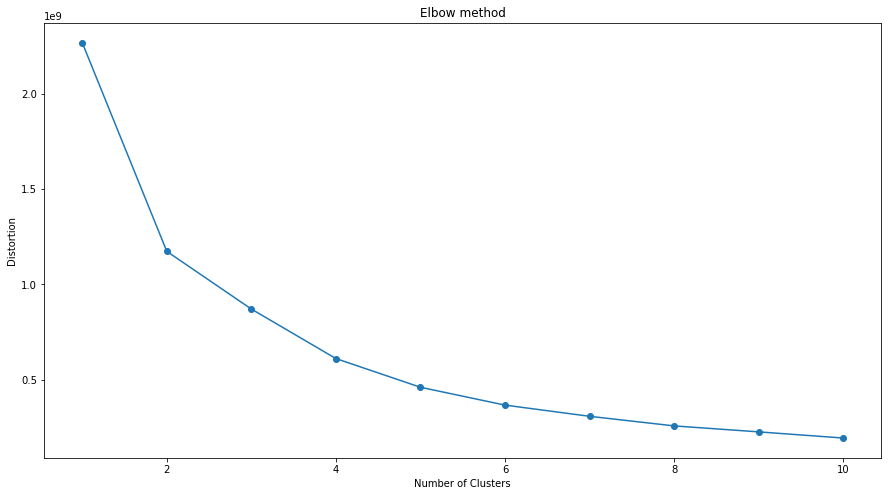

In [478]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
active_accounts_seg = active_accounts[['Current Savings Amt ','Savings_Transaction Count','Avg Amt Per Savings Transaction','Debt Owing','Credit_Transaction Count','Avg Amt Per Credit Transaction']]
df_seg_scaled = pd.DataFrame(scaler.fit_transform(active_accounts_seg), columns = active_accounts_seg.columns)

plot_inertia(active_accounts_seg)

In [698]:
len(active_accounts)*.005

1.875

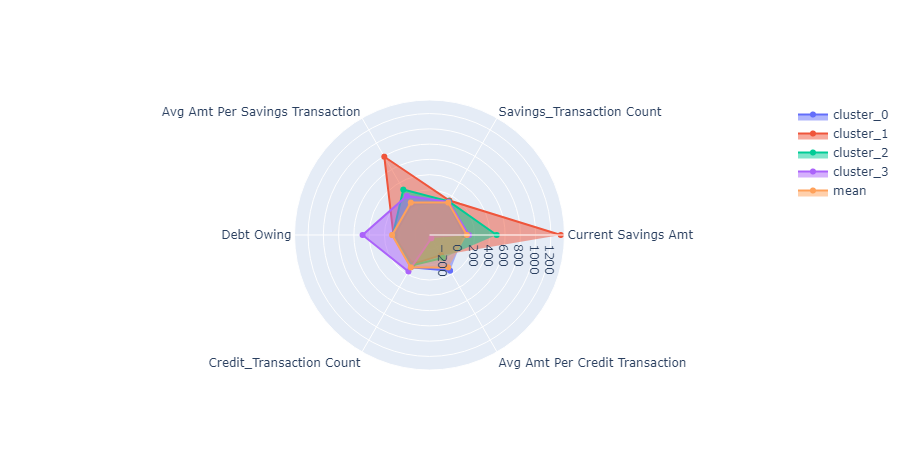

In [685]:
import plotly.graph_objects as go

#assign cluster to customers
active_accounts_seg['cluster'] = KMeans(n_clusters=4, n_init=20).fit_predict(active_accounts_seg)

# clusters size
active_accounts_seg['cluster'].value_counts()

# data to radar chart
df_radar = active_accounts_seg.groupby('cluster').mean().divide(active_accounts_seg.drop('cluster',axis=1).mean())*100

plot_radar_chart(df_radar)

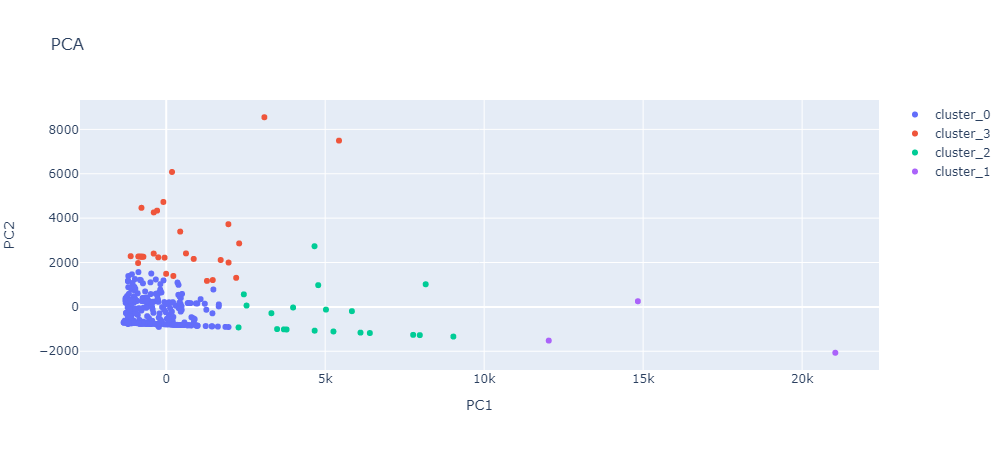

In [695]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(active_accounts_seg), columns = ['PC1', 'PC2'])
df_pca['cluster'] = active_accounts_seg['cluster'] 

plot_PCA(df_pca)

In [686]:
reframed_df = pd.merge(active_accounts[['Cust_id']],active_accounts_seg, left_index=True, right_index=True)
reframed_df = reframed_df.sort_values(by='cluster')

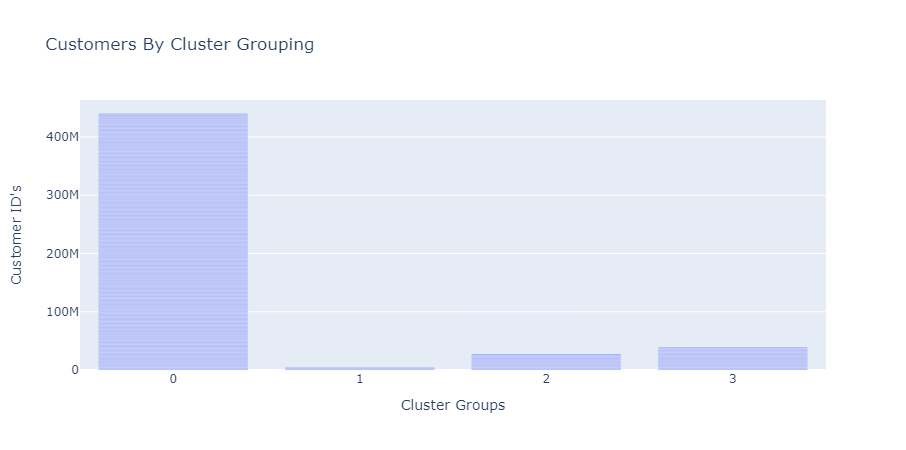

In [687]:
import plotly.graph_objs as go
data = [go.Bar(
                y=reframed_df['Cust_id'],  # NOC stands for the National Olympic Committee
                x=reframed_df['cluster'])]

# create the layout
layout = go.Layout(
    title = 'Customers By Cluster Grouping', # Graph title
    xaxis = dict(title = 'Cluster Groups'), # x-axis label
    yaxis = dict(title = 'Customer ID\'s'), # y-axis label
    hovermode ='closest' # handles multiple points landing on the same vertical
)

# create the figure
fig = go.Figure(data=data, layout=layout)
fig.show()

In [688]:
# Separated Frames by Cluster

cluster_0 = reframed_df.loc[reframed_df['cluster'] == 0]
cluster_1 = reframed_df.loc[reframed_df['cluster'] == 1]
cluster_2 = reframed_df.loc[reframed_df['cluster'] == 2]
cluster_3 = reframed_df.loc[reframed_df['cluster'] == 3]


In [689]:
reframed_df.columns

Index(['Cust_id', 'Current Savings Amt ', 'Savings_Transaction Count',
       'Avg Amt Per Savings Transaction', 'Debt Owing',
       'Credit_Transaction Count', 'Avg Amt Per Credit Transaction',
       'cluster'],
      dtype='object')

In [690]:
# Check if Customer Data has any duplicate customers
customer_data.duplicated(subset=['cust_id']).any()

False

In [691]:
# Sort Cluster Data
cluster_0 = cluster_0.sort_values('Cust_id')
cluster_1 = cluster_1.sort_values('Cust_id')
cluster_2 = cluster_2.sort_values('Cust_id')
cluster_3 = cluster_3.sort_values('Cust_id')

# Grab demographic Data for corresponding Customer ID's in Clusters
Cluster_corr_0 = customer_data.loc[customer_data['cust_id'].isin(cluster_0.Cust_id.values)].sort_values('cust_id')
Cluster_corr_1 = customer_data.loc[customer_data['cust_id'].isin(cluster_1.Cust_id.values)].sort_values('cust_id')
Cluster_corr_2 = customer_data.loc[customer_data['cust_id'].isin(cluster_2.Cust_id.values)].sort_values('cust_id')
Cluster_corr_3 = customer_data.loc[customer_data['cust_id'].isin(cluster_3.Cust_id.values)].sort_values('cust_id')
clusters = [Cluster_corr_0,Cluster_corr_1,Cluster_corr_2,Cluster_corr_3]

In [720]:
count=0
for i in [cluster_0,cluster_1,cluster_2,cluster_3]:
    print(f'Cluster #{count}')
    print(round(i[['Current Savings Amt ', 'Savings_Transaction Count',
       'Avg Amt Per Savings Transaction', 'Debt Owing',
       'Credit_Transaction Count', 'Avg Amt Per Credit Transaction']].mean()),1)
    count+=1
    print('\n')

Cluster #0
Current Savings Amt                809.0
Savings_Transaction Count           27.0
Avg Amt Per Savings Transaction      9.0
Debt Owing                         520.0
Credit_Transaction Count            26.0
Avg Amt Per Credit Transaction      27.0
dtype: float64 1


Cluster #1
Current Savings Amt                17311.0
Savings_Transaction Count             36.0
Avg Amt Per Savings Transaction       94.0
Debt Owing                           647.0
Credit_Transaction Count              14.0
Avg Amt Per Credit Transaction       -15.0
dtype: float64 1


Cluster #2
Current Savings Amt                6377.0
Savings_Transaction Count            33.0
Avg Amt Per Savings Transaction      35.0
Debt Owing                          714.0
Credit_Transaction Count             19.0
Avg Amt Per Credit Transaction       -8.0
dtype: float64 1


Cluster #3
Current Savings Amt                1654.0
Savings_Transaction Count            30.0
Avg Amt Per Savings Transaction      24.0
Debt Owing       

In [692]:
count=0
for i in clusters:
    print(f'Cluster #{count}')
    print(i.city_name.value_counts().nlargest(5),'\n')
    count+=1

Cluster #0
New York City                               46
Los Angeles                                 35
Chicago                                     22
Houston                                     16
San Francisco                                9
Name: city_name, dtype: int64 

Cluster #1
St Louis                                    1
Chicago                                     1
Riverside                                   1
Name: city_name, dtype: int64 

Cluster #2
New York City                               4
Los Angeles                                 3
Houston                                     2
San Jose                                    2
Phoenix                                     1
Name: city_name, dtype: int64 

Cluster #3
Los Angeles                                 3
Baltimore                                   3
New York City                               3
Memphis                                     2
Fort Worth                                  2
Name: city_name, dtype: int

In [619]:
import gc
collected = gc.collect()
print("Garbage collector: collected", 
          "%d objects." % collected) 

Garbage collector: collected 154 objects.
